In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [3]:
query1 = "SELECT overall, wordLength FROM amazon_book_small.help_length \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2012-01-01 00:00:00 UTC'"

In [4]:
project_id = 'dotted-chiller-156222'

In [5]:
da = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 13.93 s. Waiting...
Query done.
Processed: 203.7 Mb

Retrieving results...
  Got page: 1; 4.0% done. Elapsed 28.08 s.
  Got page: 2; 7.0% done. Elapsed 31.34 s.
  Got page: 3; 11.0% done. Elapsed 35.52 s.
  Got page: 4; 14.0% done. Elapsed 40.95 s.
  Got page: 5; 18.0% done. Elapsed 44.6 s.
  Got page: 6; 22.0% done. Elapsed 48.74 s.
  Got page: 7; 25.0% done. Elapsed 52.94 s.
  Got page: 8; 29.0% done. Elapsed 57.51 s.
  Got page: 9; 33.0% done. Elapsed 61.23 s.
  Got page: 10; 36.0% done. Elapsed 65.17 s.
  Got page: 11; 40.0% done. Elapsed 69.03 s.
  Got page: 12; 43.0% done. Elapsed 72.7 s.
  Got page: 13; 47.0% done. Elapsed 76.75 s.
  Got page: 14; 51.0% done. Elapsed 80.09 s.
  Got page: 15; 54.0% done. Elapsed 84.8 s.
  Got page: 16; 58.0% done. Elapsed 89.19 s.
  Got page: 17; 61.0% done. Elapsed 92.57 s.
  Got page: 18; 65.0% done. Elapsed 96.04 s.
  Got page: 19; 69.0% done. Elapsed 100.35 s.
  Got page: 20; 72.0% done. Elap

In [6]:
da.head(1)

,overall,wordLength
0,5,663


In [7]:
query2 = "SELECT overall, wordLength FROM amazon_book_small.help_length \
WHERE unixReviewTime >= '2012-01-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC'"

In [8]:
db = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.76 s. Waiting...
Query done.
Processed: 203.7 Mb

Retrieving results...
  Got page: 1; 2.0% done. Elapsed 20.18 s.
  Got page: 2; 3.0% done. Elapsed 24.48 s.
  Got page: 3; 5.0% done. Elapsed 28.69 s.
  Got page: 4; 7.0% done. Elapsed 33.33 s.
  Got page: 5; 8.0% done. Elapsed 37.66 s.
  Got page: 6; 10.0% done. Elapsed 42.38 s.
  Got page: 7; 11.0% done. Elapsed 46.09 s.
  Got page: 8; 13.0% done. Elapsed 49.88 s.
  Got page: 9; 15.0% done. Elapsed 54.38 s.
  Got page: 10; 16.0% done. Elapsed 58.89 s.
  Got page: 11; 18.0% done. Elapsed 63.07 s.
  Got page: 12; 20.0% done. Elapsed 66.91 s.
  Got page: 13; 21.0% done. Elapsed 71.2 s.
  Got page: 14; 23.0% done. Elapsed 74.88 s.
  Got page: 15; 24.0% done. Elapsed 78.6 s.
  Got page: 16; 26.0% done. Elapsed 83.51 s.
  Got page: 17; 28.0% done. Elapsed 87.71 s.
  Got page: 18; 29.0% done. Elapsed 91.45 s.
  Got page: 19; 31.0% done. Elapsed 95.57 s.
  Got page: 20; 33.0% done. Elapsed

In [9]:
db.head(1)

,overall,wordLength
0,5,64


In [10]:
df = pd.concat([da, db])
df.shape

(8895872, 2)

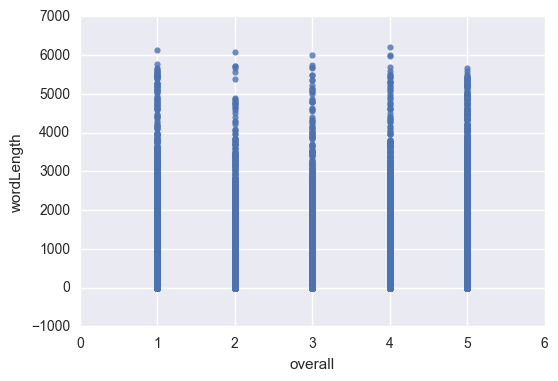

In [11]:
sns.regplot(df.overall, df.wordLength, fit_reg=False)

(-200, 7000)

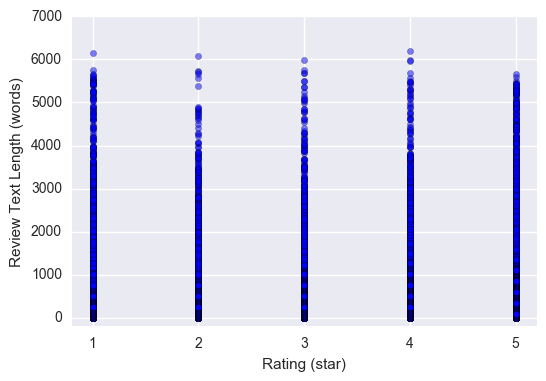

In [13]:
plt.scatter(df.overall, df.wordLength, alpha = 0.5)
plt.xlabel('Rating (star)')
plt.ylabel('Review Text Length (words)')
plt.xlim([0.8, 5.2])
plt.ylim([-200, 7000])

In [14]:
df.describe()

,overall,wordLength
count,8.895872e+06,8.895872e+06
mean,4.249978e+00,1.467505e+02
std,1.057696e+00,1.798206e+02
min,1.000000e+00,1.000000e+00
25%,4.000000e+00,3.600000e+01
50%,5.000000e+00,8.000000e+01
75%,5.000000e+00,1.890000e+02
max,5.000000e+00,6.203000e+03


In [15]:
a = df.groupby('overall')
a.describe()

wordLength
overall                    
1       count  3.237090e+05
        mean   1.545658e+02
        std    2.188239e+02
        min    1.000000e+00
        25%    4.300000e+01
        50%    8.900000e+01
        75%    1.790000e+02
        max    6.140000e+03
2       count  4.149600e+05
        mean   1.696557e+02
        std    2.012392e+02
        min    1.000000e+00
        25%    4.800000e+01
        50%    1.040000e+02
        75%    2.140000e+02
        max    6.071000e+03
3       count  9.549210e+05
        mean   1.703526e+02
        std    1.929657e+02
        min    1.000000e+00
        25%    4.200000e+01
        50%    1.030000e+02
        75%    2.300000e+02
        max    5.993000e+03
4       count  2.222542e+06
        mean   1.651373e+02
        std    1.859895e+02
        min    1.000000e+00
        25%    3.900000e+01
        50%    9.600000e+01
        75%    2.290000e+02
        max    6.203000e+03
5       count  4.979740e+06
        mean   1.316014e+02
        std    1.678180e+02
        min    1.000000e+00
        25%    3.400000e+01
        50%    6.900000e+01
        75%    1.600000e+02
        max    5.664000e+03

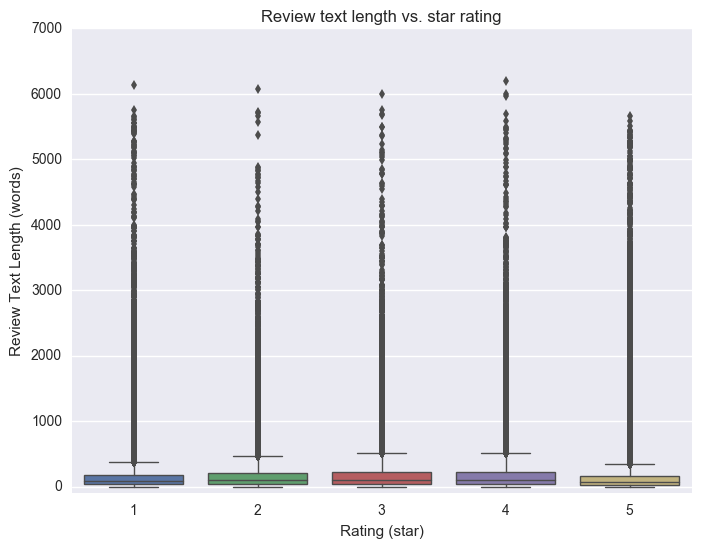

In [17]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(y="wordLength", x="overall", data=df, linewidth= 1)
sns.despine(left=True)
plt.ylim([-100, 7000])
plt.xlabel('Rating (star)')
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. star rating')

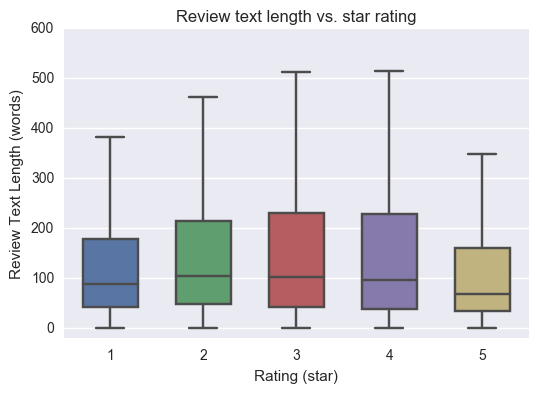

In [20]:
#plt.figure(figsize=(8, 6)) 
sns.boxplot(y="wordLength", x="overall", data=df, showfliers=False, width = 0.6)
sns.despine(left=True)
plt.xlabel('Rating (star)')
plt.ylim([-20, 600])
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. star rating')